# **CS224W - Colab 1**

In this Colab, we will write a full pipeline for **learning node embeddings**.
We will go through the following 3 steps.

To start, we will load a classic graph in network science, the [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). We will explore multiple graph statistics for that graph.

We will then work together to transform the graph structure into a PyTorch tensor, so that we can perform machine learning over the graph.

Finally, we will finish the first learning algorithm on graphs: a node embedding model. For simplicity, our model here is simpler than DeepWalk / node2vec algorithms taught in the lecture. But it's still rewarding and challenging, as we will write it from scratch via PyTorch.

Now let's get started!

**Note**: Make sure to **sequentially run all the cells**, so that the intermediate variables / packages will carry over to the next cell

In [ ]:
# 在此 Colab 中，我们将为学习节点嵌入编写完整的流程。我们将通过以下 3 个步骤。

# 首先，我们将加载network scienc中的经典图，空手道俱乐部网络。我们将探索该图的多个图统计信息。

# 然后我们将图形结构转换为 PyTorch 张量，以便我们可以对图形进行机器学习。

# 最后，我们将完成第一个图学习算法：节点嵌入模型。为了简单起见，我们这里的模型比讲座中教授的 DeepWalk / node2vec 算法更简单。但它仍然是有益的和具有挑战性的，因为我们将通过 PyTorch 从头开始​​编写它。

# 现在让我们开始吧！

# 注意：确保按顺序运行所有单元格，以便中间变量/包将转移到下一个单元格

# 1 Graph Basics
To start, we will load a classic graph in network science, the [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). We will explore multiple graph statistics for that graph.

## Setup
We will heavily use NetworkX in this Colab.

In [ ]:
import networkx as nx

## Zachary's karate club network

The [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) is a graph which describes a social network of 34 members of a karate club and documents links between members who interacted outside the club.

In [ ]:
G = nx.karate_club_graph()

# G is an undirected graph
type(G)

networkx.classes.graph.Graph

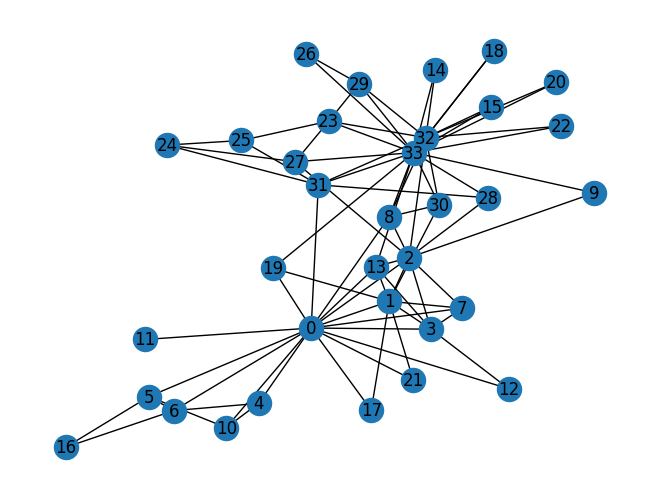

In [ ]:
# Visualize the graph
nx.draw(G, with_labels = True)

## Question 1: What is the average degree of the karate club network? (5 Points)

In [ ]:
def average_degree(num_edges, num_nodes):
  # TODO: Implement this function that takes number of edges
  # and number of nodes, and returns the average node degree of
  # the graph. Round the result to nearest integer (for example
  # 3.3 will be rounded to 3 and 3.7 will be rounded to 4)

  avg_degree = 0

  ############# Your code here ############
  avg_degree = round(2*num_edges/num_nodes)
  #########################################
# round() 是 Python 内置函数，用于对数字进行四舍五入取整操作。
# round(number[, ndigits])，其中number表示要进行取整操作的数字，ndigits表示保留的小数位数，默认值为 0（即取整到整数）。
  return avg_degree

num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
avg_degree = average_degree(num_edges, num_nodes)
print("Average degree of karate club network is {}".format(avg_degree))

Average degree of karate club network is 5


## Question 2: What is the average clustering coefficient of the karate club network? (5 Points)

In [ ]:
def average_clustering_coefficient(G):
  # TODO: Implement this function that takes a nx.Graph
  # and returns the average clustering coefficient. Round
  # the result to 2 decimal places (for example 3.333 will
  # be rounded to 3.33 and 3.7571 will be rounded to 3.76)

  avg_cluster_coef = 0

  ############# Your code here ############
  ## Note:
  ## 1: Please use the appropriate NetworkX clustering function
  avg_cluster_coef=round(nx.average_clustering(G),2)
  #########################################

  return avg_cluster_coef

avg_cluster_coef = average_clustering_coefficient(G)
print("Average clustering coefficient of karate club network is {}".format(avg_cluster_coef))

Average clustering coefficient of karate club network is 0.57


## Question 3: What is the PageRank value for node 0 (node with id 0) after one PageRank iteration? (5 Points)

Page Rank measures importance of nodes in a graph using the link structure of the web. A “vote” from an important page is worth more. Specifically, if  a page $i$ with importance $r_i$ has $d_i$ out-links, then each link gets $\frac{r_i}{d_i}$ votes. Thus, the importance of a Page $j$, represented as $r_j$ is the sum of the votes on its in links.
$$r_j = \sum_{i \rightarrow j} \frac{r_i}{d_i}$$, where $d_i$ is the out degree of node $i$.

The PageRank algorithm (used by Google) outputs a probability distribution which represent the likelihood of a random surfer clicking on links will arrive at any particular page. At each time step, the random surfer has two options
- With prob. $\beta$, follow a link at random
- With prob. $1- \beta$, jump to a random page

Thus, the importance of a particular page is calculated with the following PageRank equation:
 $$r_j = \sum_{i \rightarrow j} \beta \frac{r_i}{d_i} + (1 - \beta) \frac{1}{N}$$

Please complete the code block by implementing the above PageRank equation for node 0.

Note - You can refer to more information from the slides here - http://snap.stanford.edu/class/cs224w-2020/slides/04-pagerank.pdf




In [ ]:
# PageRank使用网络的链接结构衡量图中节点的重要性。来自重要页面的“投票”更有价值。具体来说，如果一个重要性为 ri 的页面 i 有 di 个外链，那么每个链接都会获得 ri/di 个选票。因此，表示为 rj 的页面 j 的重要性是对其链接的投票总和。

In [ ]:
# PageRank输出一个概率分布，表示随机冲浪者点击链接将到达任何特定页面的可能性。在每个时间步，随机冲浪者有两个选择:
# 有β的可能性遵循上面的link进行访问，有1-β的可能性从所有网页中随机点击一个
# 任务：通过为节点 0 实现上述 PageRank 等式来完成代码块

In [ ]:
def one_iter_pagerank(G, beta, r0, node_id):
  # TODO: Implement this function that takes a nx.Graph, beta, r0 and node id.
  # The return value r1 is one interation PageRank value for the input node.
  # Please round r1 to 2 decimal places.将r1四舍五入到小数点后两位
  #r0是第node_id节点在第0次迭代的重要度

  r1 = 0

  ############# Your code here ############
  ## Note:
  ## 1: You should not use nx.pagerank
  for ni in nx.neighbors(G,node_id):
    di = G.degree[ni]
    r1 += beta * r0 / di
  r1 += (1-beta) * (1/G.number_of_nodes())
  r1 = round(r1,2)
  #########################################

  return r1

beta = 0.8
r0 = 1 / G.number_of_nodes()
node = 0
r1 = one_iter_pagerank(G, beta, r0, node)
print("The PageRank value for node 0 after one iteration is {}".format(r1))

The PageRank value for node 0 after one iteration is 0.13


## Question 4: What is the (raw) closeness centrality for the karate club network node 5? (5 Points)

The equation for closeness centrality is $c(v) = \frac{1}{\sum_{u \neq v}\text{shortest path length between } u \text{ and } v}$

In [ ]:
def closeness_centrality(G, node=5):
  # TODO: Implement the function that calculates closeness centrality
  # for a node in karate club network. G is the input karate club
  # network and node is the node id in the graph. Please round the
  # closeness centrality result to 2 decimal places.

  closeness = 0
  node_shorted_length = nx.shortest_path_length(G,source=node)
  #source表示计算最短路径长度时的起点节点。source=node：计算从node开始到其他端点的最短距离
  #nx.shortest_path_length(G,source=node)给出的是node到其他所有节点的最短路径的长度的一个字典
  #格式类似于：{0:5, 1:4, 2:3, 3:2, 4:1，5:0}
  d = 0
  for i in range(G.number_of_nodes()):
    # if i != node:
    d += node_shorted_length[i]
  closeness = round(1/d,2)

  ## Note:
  ## 1: You can use networkx closeness centrality function.
  ## 2: Notice that networkx closeness centrality returns the normalized
  ## closeness directly, which is different from the raw (unnormalized)
  ## one that we learned in the lecture.

  #########################################

  return closeness

node = 5
closeness = closeness_centrality(G, node=node)
print("The node 5 has closeness centrality {}".format(closeness))

The node 5 has closeness centrality 0.01


# 2 Graph to Tensor
We will then work together to transform the graph $G$ into a PyTorch tensor, so that we can perform machine learning over the graph.

## Setup
Check if PyTorch is properly installed

In [ ]:
import torch
print(torch.__version__)

2.0.1+cu118


## PyTorch tensor basics

We can generate PyTorch tensor with all zeros, ones or random values.

In [ ]:
# Generate 3 x 4 tensor with all ones
ones = torch.ones(3, 4)
print(ones)

# Generate 3 x 4 tensor with all zeros
zeros = torch.zeros(3, 4)
print(zeros)

# Generate 3 x 4 tensor with random values on the interval [0, 1)
random_tensor = torch.rand(3, 4)
print(random_tensor)

# Get the shape of the tensor
print(ones.shape)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0.3282, 0.8675, 0.3665, 0.2661],
        [0.1037, 0.5896, 0.9958, 0.9057],
        [0.9583, 0.2998, 0.9630, 0.0322]])
torch.Size([3, 4])


PyTorch tensor contains elements for a single data type, the `dtype`.

In [ ]:
# Create a 3 x 4 tensor with all 32-bit floating point zeros
zeros = torch.zeros(3, 4, dtype=torch.float32)
print(zeros.dtype)

# Change the tensor dtype to 64-bit integer
zeros = zeros.type(torch.long)
print(zeros.dtype)
#torch.long是一种 64 位整数类型

torch.float32
torch.int64


## Question 5: Get the edge list of the karate club network and transform it into `torch.LongTensor`. What is the `torch.sum` value of `pos_edge_index` tensor? (10 Points)

In [ ]:
# 获取空手道俱乐部网络的边列表并将其转换为 torch.LongTensor。 pos_edge_index 张量的 torch.sum 值是多少？

In [ ]:
def graph_to_edge_list(G):
  # TODO: Implement the function that returns the edge list of
  # an nx.Graph. The returned edge_list should be a list of tuples
  # where each tuple is a tuple representing an edge connected
  # by two nodes.

  edge_list = []

  ############# Your code here ############
  for edge in G.edges():
    edge_list.append(edge)
  #########################################

  return edge_list

def edge_list_to_tensor(edge_list):
  # TODO: Implement the function that transforms the edge_list to
  # tensor. The input edge_list is a list of tuples and the resulting
  # tensor should have the shape [2 x len(edge_list)].

  edge_index = torch.tensor([])

  ############# Your code here ############
  edge_index = torch.LongTensor(edge_list).t()
  #########################################
  #转置是为了满足[2 x len(edge_list)]的output格式要求 Long是整数格式

  return edge_index

pos_edge_list = graph_to_edge_list(G)
pos_edge_index = edge_list_to_tensor(pos_edge_list)
print("The pos_edge_index tensor has shape {}".format(pos_edge_index.shape))
print("The pos_edge_index tensor has sum value {}".format(torch.sum(pos_edge_index)))

The pos_edge_index tensor has shape torch.Size([2, 78])
The pos_edge_index tensor has sum value 2535


In [ ]:
for nd in nx.non_edges(G):
  print(nd)

(0, 32)
(0, 33)
(0, 9)
(0, 14)
(0, 15)
(0, 16)
(0, 18)
(0, 20)
(0, 22)
(0, 23)
(0, 24)
(0, 25)
(0, 26)
(0, 27)
(0, 28)
(0, 29)
(0, 30)
(1, 4)
(1, 5)
(1, 6)
(1, 8)
(1, 9)
(1, 10)
(1, 11)
(1, 12)
(1, 14)
(1, 15)
(1, 16)
(1, 18)
(1, 20)
(1, 22)
(1, 23)
(1, 24)
(1, 25)
(1, 26)
(1, 27)
(1, 28)
(1, 29)
(1, 31)
(1, 32)
(1, 33)
(2, 4)
(2, 5)
(2, 6)
(2, 10)
(2, 11)
(2, 12)
(2, 14)
(2, 15)
(2, 16)
(2, 17)
(2, 18)
(2, 19)
(2, 20)
(2, 21)
(2, 22)
(2, 23)
(2, 24)
(2, 25)
(2, 26)
(2, 29)
(2, 30)
(2, 31)
(2, 33)
(3, 4)
(3, 5)
(3, 6)
(3, 8)
(3, 9)
(3, 10)
(3, 11)
(3, 14)
(3, 15)
(3, 16)
(3, 17)
(3, 18)
(3, 19)
(3, 20)
(3, 21)
(3, 22)
(3, 23)
(3, 24)
(3, 25)
(3, 26)
(3, 27)
(3, 28)
(3, 29)
(3, 30)
(3, 31)
(3, 32)
(3, 33)
(4, 5)
(4, 7)
(4, 8)
(4, 9)
(4, 11)
(4, 12)
(4, 13)
(4, 14)
(4, 15)
(4, 16)
(4, 17)
(4, 18)
(4, 19)
(4, 20)
(4, 21)
(4, 22)
(4, 23)
(4, 24)
(4, 25)
(4, 26)
(4, 27)
(4, 28)
(4, 29)
(4, 30)
(4, 31)
(4, 32)
(4, 33)
(5, 7)
(5, 8)
(5, 9)
(5, 11)
(5, 12)
(5, 13)
(5, 14)
(5, 15)
(5, 17)
(5, 1

## Question 6: Please implement following function that samples negative edges. Then answer which edges (edge_1 to edge_5) are the negative edges in the karate club network? (10 Points)

"Negative" edges refer to the edges/links that do not exist in the graph. The term "negative" is borrowed from "negative sampling" in link prediction. It has nothing to do with the edge weights.

For example, given an edge (src, dst), you should check that neither (src, dst) nor (dst, src) are edges in the Graph. If these hold true, then it is a negative edge.

In [ ]:
import random

def sample_negative_edges(G, num_neg_samples):
  # TODO: Implement the function that returns a list of negative edges.
  # The number of sampled negative edges is num_neg_samples. You do not
  # need to consider the corner case when the number of possible negative edges
  # is less than num_neg_samples. It should be ok as long as your implementation
  # works on the karate club network. In this implementation, self loops should
  # not be considered as either a positive or negative edge. Also, notice that
  # the karate club network is an undirected graph, if (0, 1) is a positive
  # edge, do you think (1, 0) can be a negative one?
  #negative edges：图中不存在的边，不考虑自环

  neg_edge_list = []

  ############# Your code here ############
  # for non_side in nx.non_edge(G):不可以这么写，因为只能appendlen(pos_edge_list)个不存在的边
  non_side_list = list(nx.non_edges(G))
  for i in range(num_neg_samples):
    neg_edge_list.append(non_side_list[i])

  #########################################

  return neg_edge_list

# Sample 78 negative edges
neg_edge_list = sample_negative_edges(G, len(pos_edge_list))

# Transform the negative edge list to tensor
neg_edge_index = edge_list_to_tensor(neg_edge_list)
print("The neg_edge_index tensor has shape {}".format(neg_edge_index.shape))

# Which of following edges can be negative ones?
edge_1 = (7, 1)
edge_2 = (1, 33)
edge_3 = (33, 22)
edge_4 = (0, 4)
edge_5 = (4, 2)

############# Your code here ############
## Note:
## 1: For each of the 5 edges, print whether it can be negative edge
print("can't" if G.has_edge(7,1) else "can")
print("can't" if G.has_edge(1,33) else "can")
print("can't" if G.has_edge(33,22) else "can")
print("can't" if G.has_edge(0,4) else "can")
print("can't" if G.has_edge(4,2) else "can")
#########################################

The neg_edge_index tensor has shape torch.Size([2, 78])
can't
can
can't
can't
can


# 3 Node Emebedding Learning

Finally, we will finish the first learning algorithm on graphs: a node embedding model.


## Setup

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

print(torch.__version__)

2.0.1+cu118


To write our own node embedding learning methods, we'll heavily use the [`nn.Embedding`](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html) module in PyTorch. Let's see how to use `nn.Embedding`:

In [ ]:
# Initialize an embedding layer 初始化embedding layer
# Suppose we want to have embedding for 4 items (e.g., nodes)
# Each item is represented with 8 dimensional vector

emb_sample = nn.Embedding(num_embeddings=4, embedding_dim=8)
#假设我们有四个Nodes 每个nodes用8维特征表示
print('Sample embedding layer: {}'.format(emb_sample))

Sample embedding layer: Embedding(4, 8)


We can select items from the embedding matrix, by using Tensor indices

In [ ]:
# Select an embedding in emb_sample
id = torch.LongTensor([1])
print(emb_sample(id))
#emb_sample中的第二个向量

# Select multiple embeddings
ids = torch.LongTensor([1, 3])
print(emb_sample(ids))

# Get the shape of the embedding weight matrix
shape = emb_sample.weight.data.shape
print(shape)
#emb.weight是一个PyTorchTensor，除了数值之外，还包含其他属性和方法，比如.grad,.shape等，这里.data是取它的数值部分

# Overwrite the weight to tensor with all ones
emb_sample.weight.data = torch.ones(shape)

# Let's check if the emb is indeed initilized
ids = torch.LongTensor([0, 3])
print(emb_sample(ids))

tensor([[-0.9967,  2.0173,  0.2194, -0.3940, -0.8077, -0.3684,  0.3885,  1.0886]],
       grad_fn=<EmbeddingBackward0>)
tensor([[-0.9967,  2.0173,  0.2194, -0.3940, -0.8077, -0.3684,  0.3885,  1.0886],
        [ 1.1833,  0.8392,  0.2794,  1.6005, -0.2247, -0.6488, -0.8566, -0.1446]],
       grad_fn=<EmbeddingBackward0>)
torch.Size([4, 8])
tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]], grad_fn=<EmbeddingBackward0>)


Now, it's your time to create node embedding matrix for the graph we have!
- We want to have **16 dimensional** vector for each node in the karate club network.
- We want to initalize the matrix under **uniform distribution**, in the range of $[0, 1)$. We suggest you using [`torch.rand`](https://pytorch.org/docs/stable/generated/torch.rand.html).

In [ ]:
# Please do not change / reset the random seed
torch.manual_seed(1)
#创建每个节点16维特征的embedding，用均匀分布[0,1)来初始化矩阵

def create_node_emb(num_node=34, embedding_dim=16):
  # TODO: Implement this function that will create the node embedding matrix.
  # A torch.nn.Embedding layer will be returned. You do not need to change
  # the values of num_node and embedding_dim. The weight matrix of returned
  # layer should be initialized under uniform distribution.

  emb = None

  ############# Your code here ############
  emb = nn.Embedding(num_node,embedding_dim)
  emb.weight.data = torch.rand(num_node,embedding_dim)
  #########################################

  return emb

emb = create_node_emb()
ids = torch.LongTensor([0, 3])

# Print the embedding layer
print("Embedding: {}".format(emb))

# An example that gets the embeddings for node 0 and 3
print(emb(ids))

Embedding: Embedding(34, 16)
tensor([[0.2114, 0.7335, 0.1433, 0.9647, 0.2933, 0.7951, 0.5170, 0.2801, 0.8339,
         0.1185, 0.2355, 0.5599, 0.8966, 0.2858, 0.1955, 0.1808],
        [0.7486, 0.6546, 0.3843, 0.9820, 0.6012, 0.3710, 0.4929, 0.9915, 0.8358,
         0.4629, 0.9902, 0.7196, 0.2338, 0.0450, 0.7906, 0.9689]],
       grad_fn=<EmbeddingBackward0>)


## Visualize the initial node embeddings
One good way to understand an embedding matrix, is to visualize it in a 2D space.
Here, we have implemented an embedding visualization function for you.
We first do PCA to reduce the dimensionality of embeddings to a 2D space.
Then we visualize each point, colored by the community it belongs to.

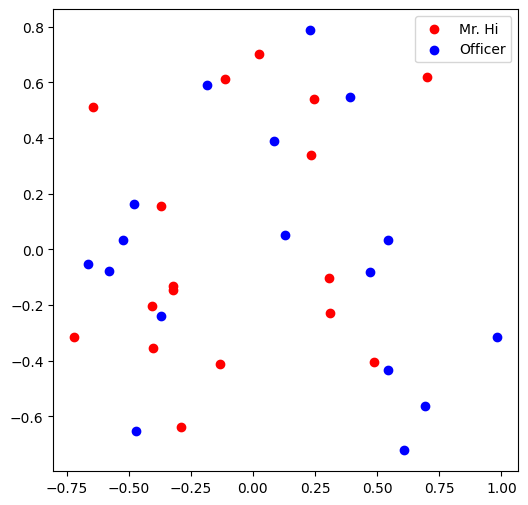

In [ ]:
def visualize_emb(emb):
  X = emb.weight.data.numpy()
  pca = PCA(n_components=2)
  #实例化PCA（保留主成分为2）
  components = pca.fit_transform(X)
  #.fit_transform(X) 是 PCA 类中的一个方法，用于对输入数据 X 进行主成分分析（PCA）的拟合和降维操作。
  #.fit(X): 对输入数据 X 进行主成分分析的拟合，计算特征值和特征向量，但不进行降维操作。这个方法通常用于在拟合后对特征值和特征向量进行进一步分析,可以通过 pca.fit(X).属性名 的方式来访问
  plt.figure(figsize=(6, 6))
  club1_x = []
  club1_y = []
  club2_x = []
  club2_y = []
  for node in G.nodes(data=True):
    if node[1]['club'] == 'Mr. Hi':
      ##node：(索引，attributes字典)
      club1_x.append(components[node[0]][0])
      club1_y.append(components[node[0]][1])
    else:
      club2_x.append(components[node[0]][0])
      club2_y.append(components[node[0]][1])
  plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
  plt.scatter(club2_x, club2_y, color="blue", label="Officer")
  plt.legend()
  plt.show()

# Visualize the initial random embeddding
visualize_emb(emb)

## Question 7: Training the embedding! What is the best performance you can get? Please report both the best loss and accuracy on Gradescope. (20 Points)

We want to optimize our embeddings for the task of classifying edges as positive or negative. Given an edge and the embeddings for each node, the dot product of the embeddings, followed by a sigmoid, should give us the likelihood of that edge being either positive (output of sigmoid > 0.5) or negative (output of sigmoid < 0.5).

Note that we're using the functions you wrote in the previous questions, _as well as the variables initialized in previous cells_. If you're running into issues, make sure your answers to questions 1-6 are correct.

In [ ]:
# 优化我们的embedding,分类是否有边（边为正的意思就是有边，边为负的意思就是没有边）。
# 给定一条边和每个节点的embedding，做点积，再加一个sigmoid，应该给我们提供该边为正(sigmoid的输出> 0.5)或负(sigmoid的输出< 0.5)的可能性。
# 注意，我们使用的是在前面的问题中编写的函数，以及在前面的单元格中初始化的变量。

In [ ]:
from torch.optim import SGD
import torch.nn as nn

def accuracy(pred, label):
  # TODO: Implement the accuracy function. This function takes the
  # pred tensor (the resulting tensor after sigmoid) and the label
  # tensor (torch.LongTensor). Predicted value greater than 0.5 will
  # be classified as label 1. Else it will be classified as label 0.
  # The returned accuracy should be rounded to 4 decimal places.
  # For example, accuracy 0.82956 will be rounded to 0.8296.
  #实现精度功能。函数接受pred张量(sigmoid之后的结果张量)和label张量。大于0.5的预测值归类为标签1。否则它将被分类为标签0。返回的精度应该四舍五入到小数点后4位。例如，精度0.82956将四舍五入到0.8296。
  accu = 0.0

  ############# Your code here ############
  right_num = ((pred > 0.5) == label).sum()
  accu = right_num.item() / (pred.shape[0])
  accu = round(accu,4)
  #########################################

  return accu

def train(emb, loss_fn, sigmoid, train_label, train_edge):
  # TODO: Train the embedding layer here. You can also change epochs and
  # learning rate. In general, you need to implement:
  # (1) Get the embeddings of the nodes in train_edge
  # (2) Dot product the embeddings between each node pair
  # (3) Feed the dot product result into sigmoid
  # (4) Feed the sigmoid output into the loss_fn
  # (5) Print both loss and accuracy of each epoch
  # (6) Update the embeddings using the loss and optimizer
  # (as a sanity check, the loss should decrease during training)
  # (1)得到train_edge中节点的embedding
  # (2)对每个节点对之间的embedding进行点积
  # (3)将点积结果送入sigmoid
  # (4)将sigmoid输出输入loss_fn
  # (5)打印每个epoch的loss和accu(作为完整性检查，loss应该在训练期间减少)

  epochs = 500
  learning_rate = 0.1

  optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)

  for i in range(epochs):

    ############# Your code here ############
    optimizer.zero_grad()#先看下面的pos_label，neg_label，train_label，train_edge都是什么
    train_node_emb = emb(train_edge)#(2,156,16)第一维的2分别是一条边的两个点，156是因为train_edge就是158（78真实边+78虚假边），16是每个点的特征
    dot_product_result = train_node_emb[0].mul(train_node_emb[1])#一条边的两个点的embedding做点积
    #（得到格式是156,16）
    dot_product_result = torch.sum(dot_product_result,1)
    #沿着横轴方向加和（156，） 把所有特征向量得到的结果加起来得到总特征分数
    score = sigmoid(dot_product_result)
    loss = loss_fn(score,train_label)
    loss.backward()
    optimizer.step()
    if i%20==0:
      print(loss)
      print(accuracy(score,train_label))


    #########################################

loss_fn = nn.BCELoss()
sigmoid = nn.Sigmoid()

print(pos_edge_index.shape)

# Generate the positive and negative labels
pos_label = torch.ones(pos_edge_index.shape[1], )
neg_label = torch.zeros(neg_edge_index.shape[1], )

# Concat positive and negative labels into one tensor
train_label = torch.cat([pos_label, neg_label], dim=0)

# Concat positive and negative edges into one tensor
# Since the network is very small, we do not split the edges into val/test sets
train_edge = torch.cat([pos_edge_index, neg_edge_index], dim=1)
print(train_edge.shape)

train(emb, loss_fn, sigmoid, train_label, train_edge)

torch.Size([2, 78])
torch.Size([2, 156])
tensor(2.0031, grad_fn=<BinaryCrossEntropyBackward0>)
0.5
tensor(0.5000, grad_fn=<BinaryCrossEntropyBackward0>)
0.7115
tensor(0.4045, grad_fn=<BinaryCrossEntropyBackward0>)
0.8397
tensor(0.3344, grad_fn=<BinaryCrossEntropyBackward0>)
0.859
tensor(0.2762, grad_fn=<BinaryCrossEntropyBackward0>)
0.8846
tensor(0.2157, grad_fn=<BinaryCrossEntropyBackward0>)
0.9295
tensor(0.1620, grad_fn=<BinaryCrossEntropyBackward0>)
0.9551
tensor(0.1206, grad_fn=<BinaryCrossEntropyBackward0>)
0.9808
tensor(0.0911, grad_fn=<BinaryCrossEntropyBackward0>)
0.9936
tensor(0.0704, grad_fn=<BinaryCrossEntropyBackward0>)
1.0
tensor(0.0560, grad_fn=<BinaryCrossEntropyBackward0>)
1.0
tensor(0.0457, grad_fn=<BinaryCrossEntropyBackward0>)
1.0
tensor(0.0380, grad_fn=<BinaryCrossEntropyBackward0>)
1.0
tensor(0.0323, grad_fn=<BinaryCrossEntropyBackward0>)
1.0
tensor(0.0278, grad_fn=<BinaryCrossEntropyBackward0>)
1.0
tensor(0.0243, grad_fn=<BinaryCrossEntropyBackward0>)
1.0
tensor(0

## Visualize the final node embeddings
Visualize your final embedding here!
You can visually compare the figure with the previous embedding figure.
After training, you should oberserve that the two classes are more evidently separated.
This is a great sanitity check for your implementation as well.

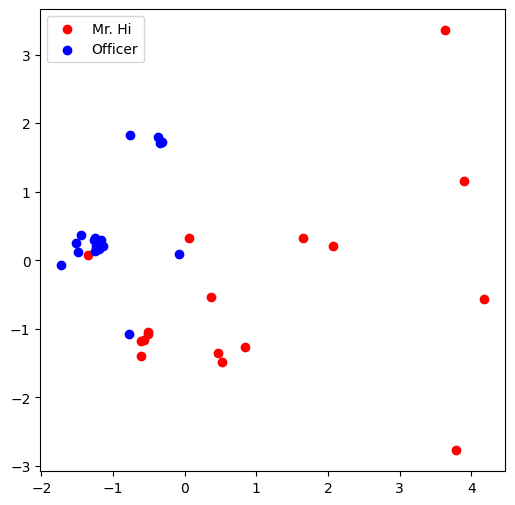

In [ ]:
# Visualize the final learned embedding
visualize_emb(emb)

# Submission

In order to get credit, you must go submit your answers on Gradescope.